In [1]:
# Import tensorflow and Keras
import tensorflow as tf
from tensorflow import keras

# Import support libraries for plotting
import matplotlib.pyplot as plt

In [2]:
# We will use the good old MNIST set of handwritten digits
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

Using TensorFlow backend.


In [3]:
# We have 60.000 training examples, each is a 28x28 matrix with values from 0 to 255
x_train.shape

(60000, 28, 28)

In [4]:
# We also have 60.000 labels for training
y_train.shape

(60000,)

In [5]:
# The labels are numbers from 1 to 9
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

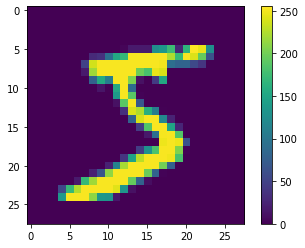

In [6]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [7]:
# We can now show the label for this image and verify it's a 5
y_train[0]

5

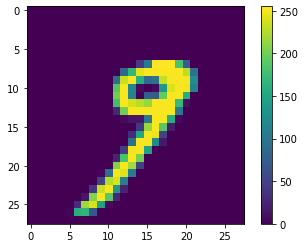

In [8]:
# Let's see another example
plt.imshow(x_train[33])
plt.colorbar()
plt.grid(False)
plt.show()

In [9]:
y_train[33]

9

In [10]:
# Now let's do some image pre-processing
# Neural networks work better with values between 0 and 1, so let's put them in that range:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [11]:
# Now it's time to build a neural network

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(216, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])


In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 216)               110808    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               27776     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_5 (Dense)              (None, 16)                5

In [13]:
history = model.fit(x_train, y_train, epochs=20, batch_size=15)

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 25s 420us/sample - loss: 0.2670 - accuracy: 0.9205
Epoch 2/20
60000/60000 [==============================] - 25s 412us/sample - loss: 0.1127 - accuracy: 0.9670
Epoch 3/20
60000/60000 [==============================] - 26s 440us/sample - loss: 0.0833 - accuracy: 0.9768
Epoch 4/20
60000/60000 [==============================] - 24s 400us/sample - loss: 0.0668 - accuracy: 0.9816
Epoch 5/20
60000/60000 [==============================] - 25s 418us/sample - loss: 0.0579 - accuracy: 0.9838
Epoch 6/20
60000/60000 [==============================] - 36s 606us/sample - loss: 0.0475 - accuracy: 0.9871
Epoch 7/20
60000/60000 [==============================] - 36s 598us/sample - loss: 0.0421 - accuracy: 0.9887
Epoch 8/20
60000/60000 [==============================] - 35s 580us/sample - loss: 0.0356 - accuracy: 0.9905
Epoch 9/20
60000/60000 [==============================] - 32s 534us/sample - loss: 0.0341 - accuracy: 0.9

In [14]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=0)

print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

Test accuracy: 0.9822
Test loss: 0.14858887433931195


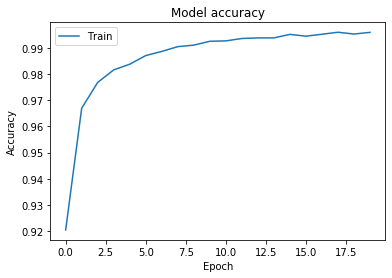

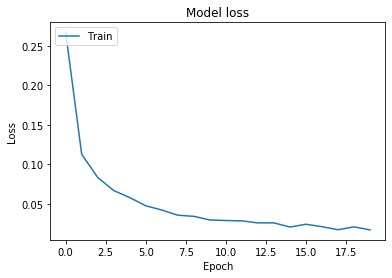

In [15]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()
